https://www.kaggle.com/code/kasimchristianloan/nlu-covid-emotion-showcase

In [1]:
import nlu

In [2]:
import os
import numpy as np 
import pandas as pd 



In [3]:
df = pd.read_csv('reviews.csv')
df2 = pd.read_csv('pros.csv')
df3 = pd.read_csv('cons.csv')

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df['pros_lemma'] = df2['pros']
df['cons_lemma'] = df3['cons']

In [6]:
df.head()

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons,pros_lemma,cons_lemma
0,Amazing!,"Aug 12, 2021",Senior Sales Recruiter,"Aug 12, 2021 - Senior Sales Recruiter",5.0,"-Unparalleled team, benefits, and overall comp...","-Hyper growth always means a big work load, bu...","[ ' [ ' , ' Unparalleled ' , ' team ' , ' bene...","[ ' Hyper ' , ' growth ' , ' always ' , ' mean..."
1,Amazing Company,"Aug 6, 2022","LMTS, Software Engineering","Aug 6, 2022 - LMTS, Software Engineering",5.0,Work life balance\r\nRespect\r\nSalesforce car...,May not offer salary like FAANG companies.,"[ ' [ ' , ' Work ' , ' life ' , ' balance ' , ...","[ ' May ' , ' ' , ' offer ' , ' salary ' , ' l..."
2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,- Benefits are top notch\r\n- Perks in the tow...,"I came into Salesforce like every rep, excited...","[ ' [ ' , ' Benefits ' , ' top ' , ' notch ' ,...","[ ' ' , ' came ' , ' ' , ' Salesforce ' , ' li..."
3,Great Company,"Aug 4, 2022",Operations Analyst,"Nov 30, 2020 - Account Executive- Core Team",5.0,Company is really great and the working cultur...,There are times promotions are political,"[ ' [ ' , ' Company ' , ' really ' , ' great '...","[ ' ' , ' ' , ' time ' , ' promotion ' , ' ' ,..."
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,PTO\nSalary\nCulture\nCEO & Character,Project teams can be very silo'd which makes i...,"[ ' [ ' , ' PTO ' , ' Salary ' , ' Culture ' ,...","[ ' Project ' , ' team ' , ' ' , ' ' , ' ' , '..."


In [7]:
df.shape

(16920, 9)

## Emotion analysis

22/08/09 17:15:47 WARN Utils: Your hostname, HITOMIs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.84.21 instead (on interface en0)
22/08/09 17:15:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/hitomihoshino/.ivy2/cache
The jars for the packages stored in: /Users/hitomihoshino/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-045cb81b-fe83-45fb-8ae5-be4f2ac157ae;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.0.2 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.p

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ | ]classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ / ]Download done! Loading the resource.
[ \ ]

2022-08-09 17:16:08.544924: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ]tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ / ]Download done! Loading the resource.
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

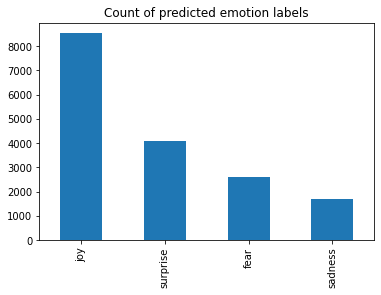

In [8]:
em_sum = nlu.load('emotion').predict(df['Summary'],output_level='document')
em_sum['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

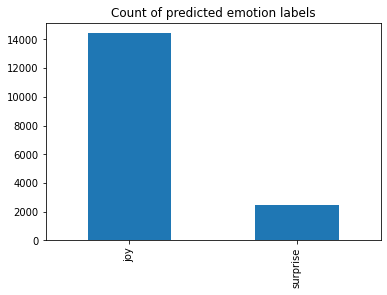

In [9]:
em_pros = nlu.load('emotion').predict(df['Pros'],output_level='document')
em_pros['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

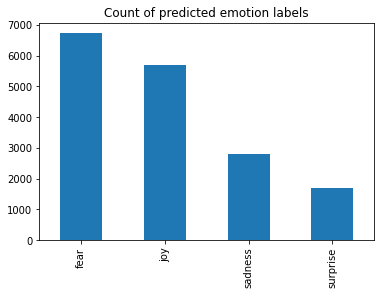

In [10]:
em_cons = nlu.load('emotion').predict(df['Cons'],output_level='document')
em_cons['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

In [11]:
df['emotion_pros'] = em_pros['emotion']
df['emotion_cons'] = em_cons['emotion']
df['emotion_sum'] = em_sum['emotion']

In [12]:
df.head()

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons,pros_lemma,cons_lemma,emotion_pros,emotion_cons,emotion_sum
0,Amazing!,"Aug 12, 2021",Senior Sales Recruiter,"Aug 12, 2021 - Senior Sales Recruiter",5.0,"-Unparalleled team, benefits, and overall comp...","-Hyper growth always means a big work load, bu...","[ ' [ ' , ' Unparalleled ' , ' team ' , ' bene...","[ ' Hyper ' , ' growth ' , ' always ' , ' mean...",joy,fear,surprise
1,Amazing Company,"Aug 6, 2022","LMTS, Software Engineering","Aug 6, 2022 - LMTS, Software Engineering",5.0,Work life balance\r\nRespect\r\nSalesforce car...,May not offer salary like FAANG companies.,"[ ' [ ' , ' Work ' , ' life ' , ' balance ' , ...","[ ' May ' , ' ' , ' offer ' , ' salary ' , ' l...",joy,joy,joy
2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,- Benefits are top notch\r\n- Perks in the tow...,"I came into Salesforce like every rep, excited...","[ ' [ ' , ' Benefits ' , ' top ' , ' notch ' ,...","[ ' ' , ' came ' , ' ' , ' Salesforce ' , ' li...",joy,fear,sadness
3,Great Company,"Aug 4, 2022",Operations Analyst,"Nov 30, 2020 - Account Executive- Core Team",5.0,Company is really great and the working cultur...,There are times promotions are political,"[ ' [ ' , ' Company ' , ' really ' , ' great '...","[ ' ' , ' ' , ' time ' , ' promotion ' , ' ' ,...",joy,fear,joy
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,PTO\nSalary\nCulture\nCEO & Character,Project teams can be very silo'd which makes i...,"[ ' [ ' , ' PTO ' , ' Salary ' , ' Culture ' ,...","[ ' Project ' , ' team ' , ' ' , ' ' , ' ' , '...",joy,joy,joy


In [15]:
df.columns

Index(['Summary', 'Date', 'JobTitle', 'AuthorLocation', 'OverallRating',
       'Pros', 'Cons', 'pros_lemma', 'cons_lemma', 'emotion_pros',
       'emotion_cons', 'emotion_sum'],
      dtype='object')

In [18]:
em_con_fear = df[df['emotion_cons'] == 'fear']
em_con_fear = em_con_fear[['OverallRating', 'Cons', 'emotion_cons']]

In [19]:
em_con_fear

,OverallRating,Cons,emotion_cons
0,5.0,"-Hyper growth always means a big work load, bu...",fear
2,3.0,"I came into Salesforce like every rep, excited...",fear
3,5.0,There are times promotions are political,fear
9,5.0,Experiencing growing pains transitioning from ...,fear
10,5.0,"-Hyper growth always means a big work load, bu...",fear
...,...,...,...
16908,5.0,There are times promotions are political,fear
16910,5.0,"-Hyper growth always means a big work load, bu...",fear
16911,5.0,Large company. You can get lost in the numbers,fear
16912,3.0,"I came into Salesforce like every rep, excited...",fear


## Sentiment

In [13]:
# senti_predictions = nlu.load('sentiment').predict(df['Pros'],output_level='document')
# senti_predictions['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [14]:
# senti_predictions[senti_predictions['sentiment'] == 'neg']